In [35]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

In [2]:
#import data set, dataset was downloaded from Kaggle:https://www.kaggle.com/datasets/hamidrezabakhtaki/fmcg-export-sale
df=pd.read_csv("ExportSales.csv")
df.head(2)

,ID,Date,Category,Invoice Number,Product Code,Customer Code,Destenation,QTY,Total Price
0,2529604,2019-04-28,Category5,267,30011006,612,IRQ,750,3334.8225
1,2529605,2019-04-29,Category5,302,30011006,514,BHR,400,3032.8240


In [3]:
#Filter data for regression
df_reg=df[["QTY","Total Price"]]

In [4]:
#Checking if we have missing data
df_reg.isnull().sum()

QTY            0
Total Price    0
dtype: int64

In [5]:
#Define a size
plt.rcParams["figure.figsize"] = (12, 8)

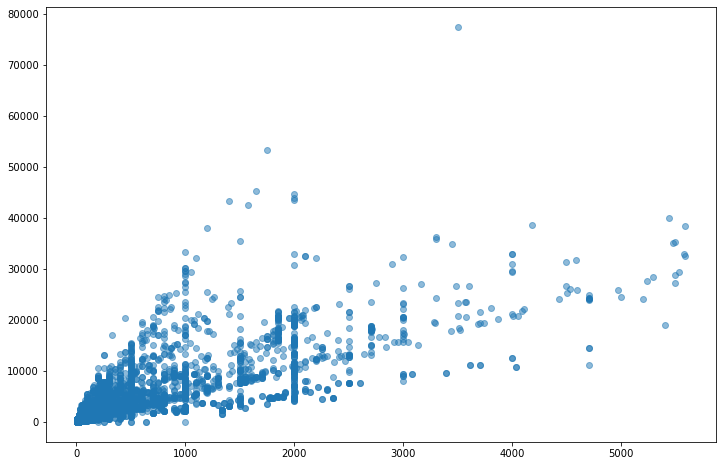

In [6]:
#Create a scatter plot to see depandiencies 
plt.scatter(df_reg["QTY"], df_reg["Total Price"], alpha=0.5)
plt.show()

In [7]:
#Split data into X and y with reshape function
X = df_reg["QTY"].to_numpy().reshape(-1, 1)
y = df_reg["Total Price"].to_numpy().reshape(-1, 1)

In [8]:
#Splitting data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
#Lets begin with Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [10]:
# Compute the mean absolute error (MAE) of the predictions
mae = mean_absolute_error(y_test, y_pred)
mae

1557.3061927514289

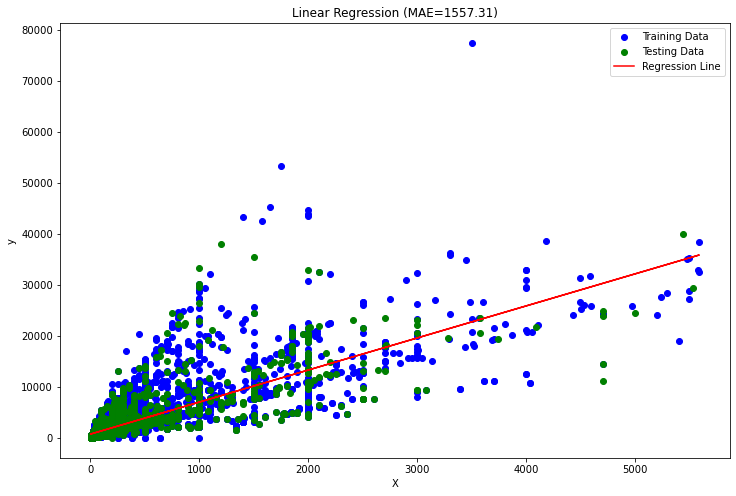

In [11]:
# Plot the training and testing data as well as the regression line
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='green', label='Testing Data')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title(f'Linear Regression (MAE={mae:.2f})')
plt.legend()
plt.show()

In [15]:
#Lets try to use RandomTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_dt = dt.predict(X_test)

In [16]:
# Compute the mean absolute error (MAE) of the predictions
mae = mean_absolute_error(y_test, y_dt)
mae

1350.8600365806483

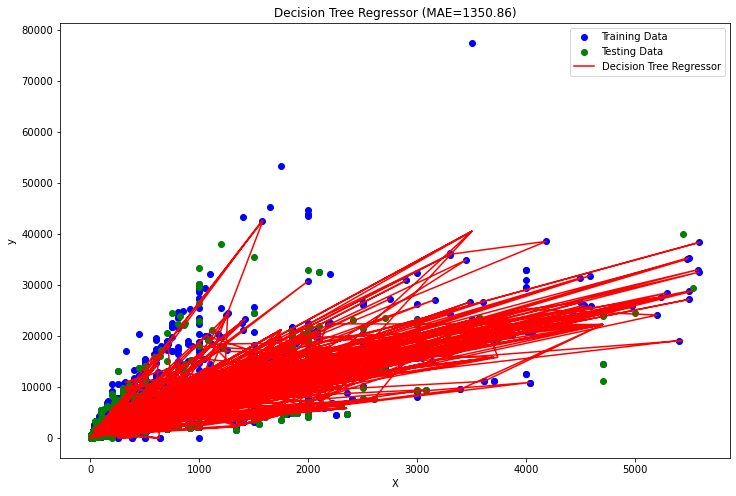

In [18]:
# Plot the training and testing data as well as the regression line
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='green', label='Testing Data')
plt.plot(X, dt.predict(X), color='red', label='Decision Tree Regressor')
plt.xlabel('X')
plt.ylabel('y')
plt.title(f'Decision Tree Regressor (MAE={mae:.2f})')
plt.legend()
plt.show()

In [32]:
#Lets learn ensemble model Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
y_rf = rf.predict(X_test)

C:\Users\piotr\AppData\Local\Temp\ipykernel_10444\3019953279.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


In [33]:
# Compute the mean absolute error (MAE) of the predictions
mae = mean_absolute_error(y_test, y_rf)
mae

1337.3396080191235

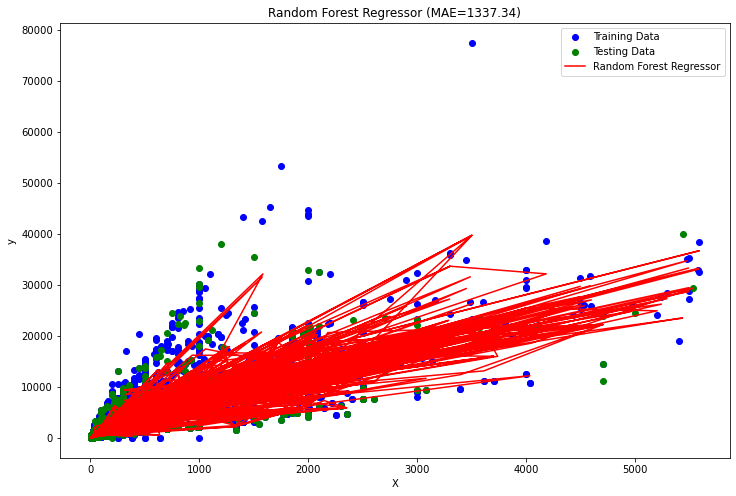

In [34]:
# Plot the training and testing data as well as the regression line
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='green', label='Testing Data')
plt.plot(X, rf.predict(X), color='red', label='Random Forest Regressor')
plt.xlabel('X')
plt.ylabel('y')
plt.title(f'Random Forest Regressor (MAE={mae:.2f})')
plt.legend()
plt.show()

In [51]:
#Lets try other ensemble mode AdaBoost
abr = AdaBoostRegressor(n_estimators=100, learning_rate=0.01, loss='linear', random_state=42)
abr.fit(X_train, y_train)
y_pred = abr.predict(X_test)

C:\Users\piotr\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [52]:
# Compute the mean absolute error (MAE) of the predictions
mae = mean_absolute_error(y_test, y_pred)
mae

1487.427794325179

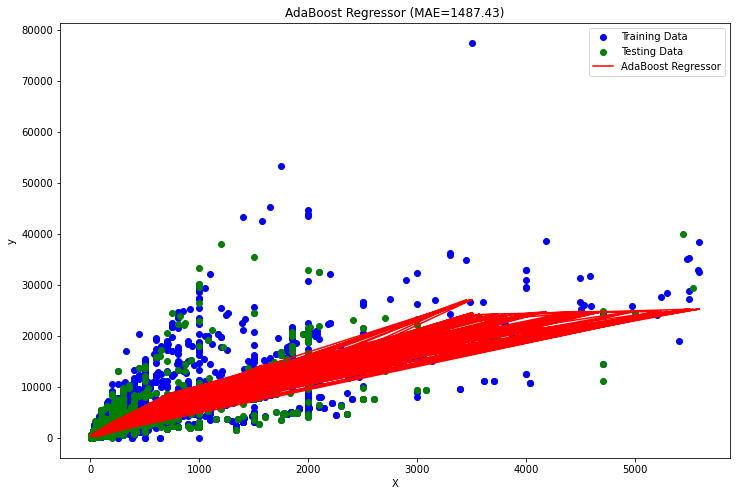

In [53]:
# Plot the training and testing data as well as the regression line
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='green', label='Testing Data')
plt.plot(X, abr.predict(X), color='red', label='AdaBoost Regressor')
plt.xlabel('X')
plt.ylabel('y')
plt.title(f'AdaBoost Regressor (MAE={mae:.2f})')
plt.legend()
plt.show()